# Links

A *colormap* is a palette constructed by sampling some *smooth, linear* function between two end colors. Colormaps are generally used for 2-D or 3-D plots, where the color serves as an extra \"dimension\". This is implemented in matplotlib with the [LinearSegmentedColormap](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html), and also with the special ProPlot [PerceptuallyUniformColormap](https://proplot.readthedocs.io/en/latest/api/proplot.styletools.PerceptuallyUniformColormap.html#proplot.styletools.PerceptuallyUniformColormap) class. Use this notebook to experiment with different colormaps on sample datasets.

The following online GUI tools can be used to generate perceptually uniform colormaps.

* [cmOcean](https://matplotlib.org/cmocean/)
* [SciVisColor](https://sciviscolor.org/home/colormaps/)
* [Fabio Crameri](http://www.fabiocrameri.ch/colourmaps.php)
* [Chroma.js](https://gka.github.io/palettes/)
* [Chroma.js fork](http://tristen.ca/hcl-picker/#/hlc/12/0.99/C6F67D/0B2026)
* [HCLWizard](http://hclwizard.org:64230/hclwizard/)

You can also programatically generate perceptually uniform colormaps with [ProPlot](https://proplot.readthedocs.io/).

# Colorblind friendly
Something we didn't get into -- you generally want your colormaps to be colorblind friendly. A great tool for testing this is the [Color Oracle](https://colororacle.org) app. In the future, you may also be able to use ProPlot to test the colorblind-friendliness of colormaps.

# Online colormaps 
The below cell uses ProPlot to [register colormaps](https://proplot.readthedocs.io/en/latest/colors.html#adding-online-color-colormaps) online. Try plotting some sample data with them!

In [2]:
import os
import proplot as plot

# Paste a list of hex strings in the below string
name = 'tmp'
hexdata = """
#000000 #ffffff
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.hex'), 'w') as f:
    f.write(hexdata)
    
# Paste a 3-column table of RGB data in the below string
name = 'tmp'
rgbdata = """
0, 0, 0
1, 1, 1
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.rgb'), 'w') as f:
    f.write(rgbdata)
    
# Paste a 4-column table of "colormap coordintes" and RGB data in the below string
# This time the first column is a colormap coordinate
name = 'tmp'
xrgbdata = """
0, 0, 0, 0
1, 1, 1, 1
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.xrgb'), 'w') as f:
    f.write(xrgbdata)
    
# Paste XML data in the below string
# Some websites only save colormap data as XML strings
name = 'tmp'
xmldata = """
<ColorMap>
  <Point x="0" r="0" g="0" b="0"/>
  <Point x="1" r="1" g="1" b="1"/>
</ColorMap>
"""
with open(os.path.expanduser(f'~/.proplot/cmaps/{name}.xml'), 'w') as f:
    f.write(xmldata)
    
# Load new colormaps into ProPlot
plot.register_cmaps()

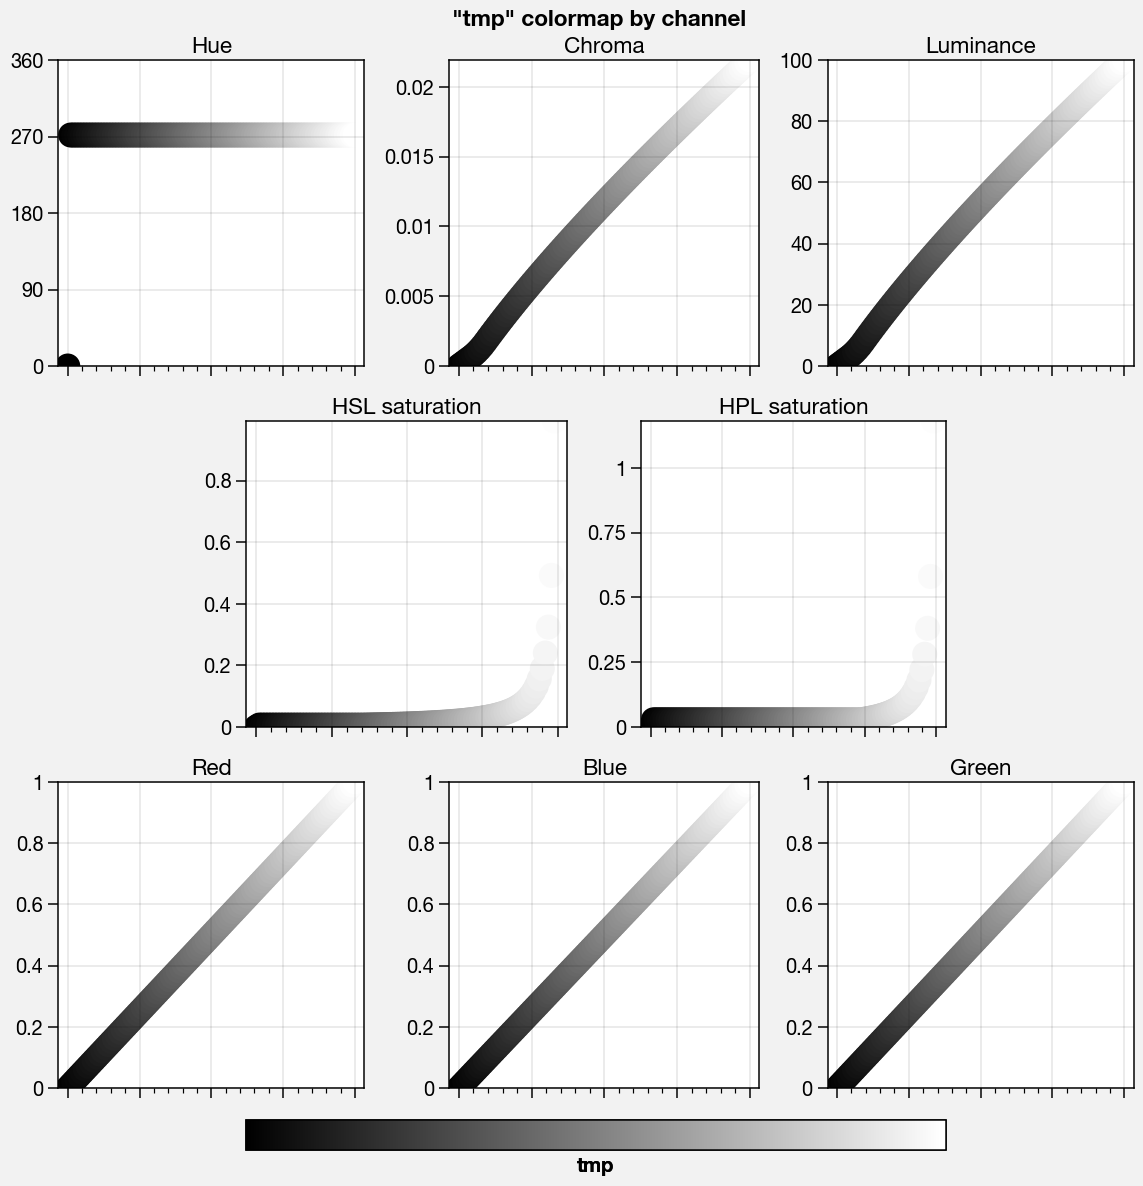

In [10]:
# Breakdown of your colormap
f = plot.show_channels('tmp')

# ProPlot colormaps

The below cells use ProPlot to design custom colormaps using some helper functions.

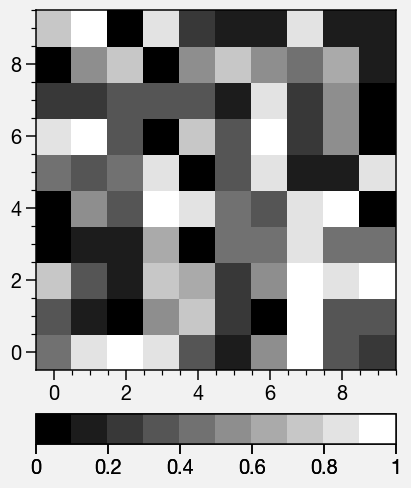

In [16]:
# Plot random data
import proplot as plot
import numpy as np

f, ax = plot.subplots()
ax.pcolor(np.random.rand(10,10), cmap='name', colorbar='b')

# Try out your colormaps

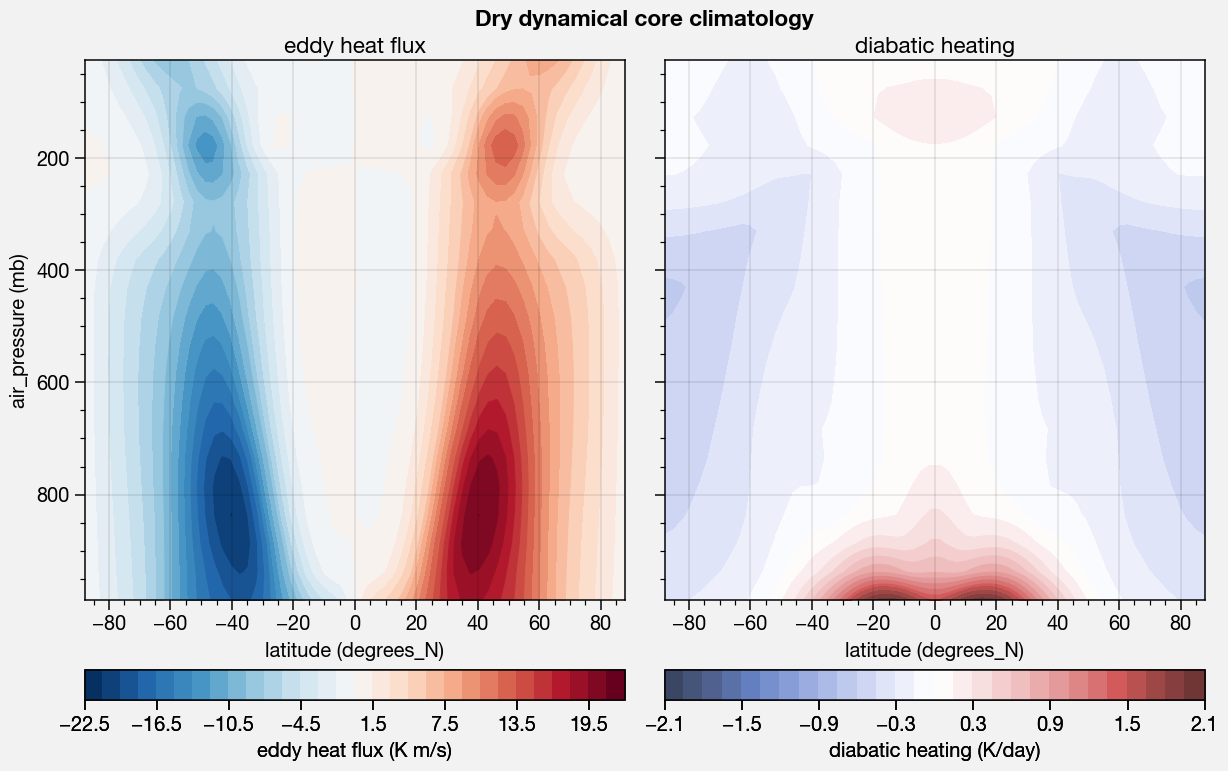

In [1]:
import proplot as plot
import xarray as xr

# Your colormaps below!
cmap1 = 'BuRd'
cmap2 = 'Div'

# Plot model data
N = 30 # number of levels
data = xr.open_dataset('../data/HS94.climate.d0500-d3500.nc', decode_times=False)
ehf = data['ehf'].isel(lon=0, time=0)
tdt = data['tdt'].isel(lon=0, time=0)*3600*24
tdt.attrs['long_name'] = 'diabatic heating'
tdt.attrs['units'] = 'K/day'
f, axs = plot.subplots(ncols=2, axwidth=3, span=False)
axs[0].contourf(ehf, symmetric=True, N=N, cmap=cmap1, colorbar='b')
axs[1].contourf(tdt, symmetric=True, N=N, cmap=cmap2, colorbar='b')
axs.format(suptitle='Dry dynamical core climatology', yreverse=True)

In [4]:
# Plot oceanographic data


In [ ]:
# Plot sea ice data
